In [14]:
import cv2
import numpy as np

In [15]:

widthHeight = 320
classFile = './coco.names'
classNames = []
confThreshold = 0.5
nmsThreshold = 0.2  
with open(classFile, 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
print(classNames)
print(len(classNames))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [16]:
modelConfiguration = './yolov3.cfg'
modelWeights = './yolov3.weights'

net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)


In [17]:
def findObjects(outputs, img):
    height, width, channel = img.shape
    Bounding_box = []  
    classIds = []  
    confs = []  

    for output in outputs:
        
        for detection in output:
            scores = detection[5:] 
            classId = np.argmax(scores)  
            confidence = scores[classId]
            if confidence > confThreshold:
                
                w, h = int(detection[2] * width), int(detection[3] * height)
                x, y = int((detection[0] * width) - w / 2), int((detection[1] * height) - h / 2) 
                Bounding_box.append([x, y, w, h])
                classIds.append(classId)
                confs.append(float(confidence))

  
    indices = cv2.dnn.NMSBoxes(Bounding_box, confs, confThreshold, nmsThreshold)

    for i in indices:
        i = i[0]
        box = Bounding_box[i]
        x, y, w, h = box[0], box[1], box[2], box[3]
        
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 2)
        cv2.putText(img, f'{classNames[classIds[i]].upper()}{int(confs[i]*100)}%',
                    (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)
        

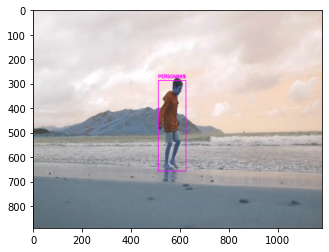

In [27]:
import matplotlib.pyplot as plt
while True:
    img = cv2.imread("./kid.jpeg")

    
    try:
      
      blob = cv2.dnn.blobFromImage(img, 1 / 255, (widthHeight, widthHeight), [0, 0, 0], 1, crop=False)
    except:
      continue
    net.setInput(blob)
    layersNames = net.getLayerNames()
   
    outputNames = [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    

    outputs = net.forward(outputNames)
  
    findObjects(outputs, img)

    plt.imshow(img)
    break